In [1]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap
from multiprocessing import Pool
# from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm # Progress bar

from runge_kutta import RungeKuttaLoose
from plotting import plot_systems_evolution_2d_3d

In [19]:
vi = 0.01

Vol = vi*10**(-14); NA = 6.02*10**(23); Cal = NA*Vol*10**(-6)

TC = 0.158

kc1 = 0.15*Cal*TC
# production of p53 [molecules/min]

kc2 = 0.1*TC
# degradation of p53 by mdm2 [1/min]

kc3 = 0.1*Cal
# degradation of p53 by mdm2 [molecules]

kc4 = 0.1/Cal*TC
# production of mdm2 - mRNA [1/(molecules*min)]

kc5 = 0.1*TC 
# degradation of mdm2 - mRNA [1/min]

kc6 = 0.2*TC 
# production of mdm2 [1/min]

kc7 = 0.1*TC 
# degradation of mdm2 [1/min]

kc8 = 0.0036 
# binding of mdm2 and nutlin [1/(molecules*min)]

# Initial state
p0, m0, M0 = [20, 5, 0.5]

In [20]:
# Run a single simulation with a specified value of kc2
def simulation(time, dt, p0, m0, M0, k2):
    p, m, M = [p0], [m0], [M0]
    time_arr = np.arange(0, time * dt, dt)
    
    for i in range(time - 1): # correcting length of arrays to exactly match no. of iterations
        p_n, m_n, M_n = RungeKuttaLoose(dt, p[-1], m[-1], M[-1], k2, kc1, kc3, kc4, kc5, kc6, kc7)
        p.append(p_n)
        m.append(m_n)
        M.append(M_n)
    
    return p, m, M, time_arr

In [21]:
def simulate_for_k2_range(time, dt, p0, m0, M0, k2_range):
    simulations = []

    for k2 in tqdm(k2_range, desc="Simulating"): # tqdm er progress bar, ikke andet
        p, m, M, time_arr = simulation(time, dt, p0, m0, M0, k2)
        simulations.append({"k2_val": k2, "trajectory": {"p": p, "m": m, "M": M}, "time": time_arr})
    
    return simulations

In [22]:
k2_step = 0.004
# k2_range = np.arange(0.0055, 0.006, k2_step) TÆT PÅ HER
# k2_range = np.arange(0.0079, 0.00802, k2_step) # THIS IS IT!
k2_range = np.arange(0.00158, 0.0158, k2_step)
print(f'''Start-value: {k2_range[0]}\n
Stop-value: {k2_range[-1]}\n
Step-value: {k2_step}\n
No. of simulations for this range: {len(k2_range)}''')

Start-value: 0.00158

Stop-value: 0.01358

Step-value: 0.004

No. of simulations for this range: 4


In [23]:
dt = 0.01 # minutes
iterations = 1000000
total_runtime_in_minutes = iterations*dt

print(f"Simulation time in minutes: {total_runtime_in_minutes}")
print(f"Simulation time in hours: {total_runtime_in_minutes / 60}")

Simulation time in minutes: 10000.0
Simulation time in hours: 166.66666666666666


### Generate the simulations

In [24]:
# Runs simulations with above k2 range for 
simulations_dict = simulate_for_k2_range(iterations, dt, p0, m0, M0, k2_range)

Simulating: 100%|██████████| 4/4 [00:17<00:00,  4.32s/it]


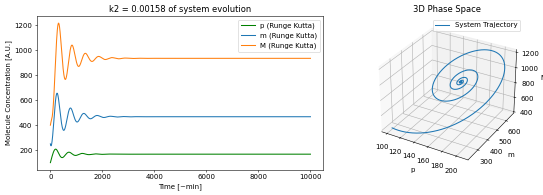

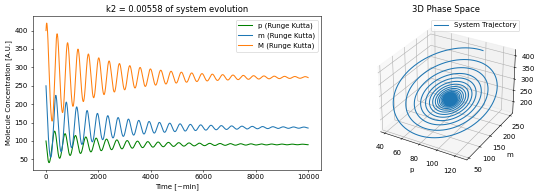

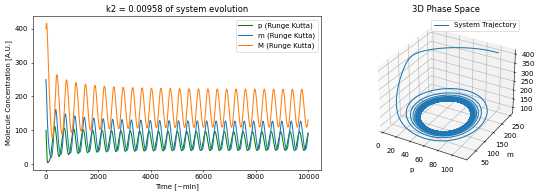

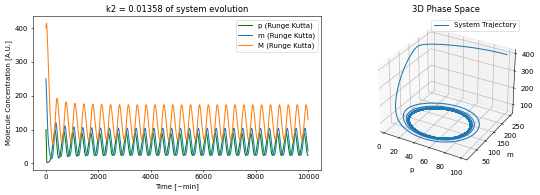

In [25]:
plot_systems_evolution_2d_3d(simulations = simulations_dict, single_fig = False, dpi = 50, filename = "testing", save_fig=False)